<a href="https://colab.research.google.com/github/vikpy/mtechdatascience_mlcourse/blob/master/lec3_Naive_Bayes_Fruit_Color_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import pandas
import pandas as pd
col_names = ['fruit_label','fruit_name','fruit_subtype','mass','width','height','color_score']
# load dataset
pima = pd.read_csv("/content/drive/My Drive/data_ml_course/fruit_data_with_colors_upd.txt",delimiter="\t", skiprows=[0], header=None, names=col_names)

In [17]:
pima.head()
pima.shape

(38, 7)

In [0]:
#split dataset in features and target variable
feature_cols = ['mass','width','height','color_score']
X = pima[feature_cols] # Features
y = pima.fruit_label # Target variable

In [0]:
# split X and y into training and testing sets
from sklearn import model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.25,random_state=0)

In [0]:
# import the class

from sklearn.naive_bayes import GaussianNB

# instantiate the model (using the default parameters)
model = GaussianNB()

# fit the model with data
model.fit(X_train,y_train)

#
y_pred = model.predict(X_test)

In [11]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5, 0],
       [1, 4]])

In [0]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

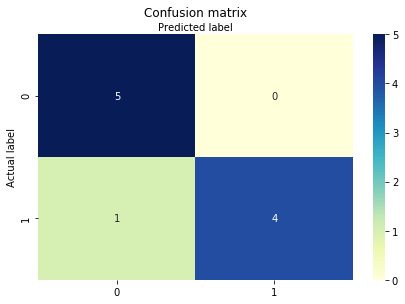

In [13]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9
Precision: 0.8333333333333334
Recall: 1.0


In [15]:
y_pred_proba = model.predict_proba(X_test)[::,1]
y_pred_proba

array([9.99999986e-01, 7.19673846e-01, 9.38491679e-03, 1.40471623e-03,
       1.09086300e-03, 1.00000000e+00, 9.94524523e-01, 7.22083267e-03,
       1.70703021e-01, 1.86211121e-08])

In [16]:
y_test

22    3
29    3
16    1
15    1
11    1
20    3
26    3
10    1
25    3
2     1
Name: fruit_label, dtype: int64